Marcus Frischherz, Matrikelnummer 08225094

# 280413-1 Astronomische Instrumente
## Übung 4

### Detektoren 1
Was ist der auflösungslimitierende Faktor beim menschlichen
Auge (Tag/Nacht)? Beugung an der Öffnung oder
Größe/Abstand der „Detektorpixel“? Andere Effekte?



Antwort:

Hell / Tag:

Öffnungsverhältnis: O = D / f = 1 mm / 15 mm, f 1:15.

Abbildungsmaßstab s = 206265"/15 mm = 13751" / mm

Detektor (Netzhaut) ~ 8 mm. Bildfeld = (13751" * 8) x  (13751" * 8) = 30° x 30°

5000000 Pixel => bei quadratischer Anordnung 2236x2236 Pixel. Bei Näherung Quadrat, durchschnittlicher Abstand: 3.6 um.

Beugung an der Iris, Rayleighkriterium: $\alpha = 1.22 \lambda / D = 1.22 \cdot 555 nm / 1 mm = 140" $

Ideale Pixelgröße (Nyquist) = 140"/2/(13751"/mm) = 5,1 um

1 Pixel: 1,6 um, allerdings im Abstand von 3,6 um. Daraus folgt: Das Auge ist fast perfekt abgestimmt. Für eine bessere Auflösung müsste sowohl die Apertur vergrößert werden als auch die Pixeldichte erhöht werden.

Dunkel / Nacht:

Öffnungsverhältnis: O = D / f = 8 mm / 15 mm, f 1:1.875.

Abbildungsmaßstab s = 206265"/15 mm = 13751" / mm

Detektor (Netzhaut) ~ 8 mm. 100 MPixel => bei quadratischer Anordnung 10000x10000 Pixel. Bei Näherung Quadrat, durchschnittlicher Abstand: 0.8 um.

Beugung an der Iris, Rayleighkriterium: $\alpha = 1.22 \lambda / D = 1.22 \cdot 500 nm / 8 mm = 15.7" $

Ideale Pixelgröße (Nyquist) = 15.7"/2/(13751"/mm) = 0.6 um

1 Pixel: 0.8 um. Daraus folgt: Die Pixelgröße ist fast perfekt abgestimmt. Für eine bessere Auflösung müsste sowohl die Apertur vergrößert werden als auch die Pixeldichte erhöht werden.



### Detektoren 2
Ein intrinsischer Halbleiter hat einen Abstand zwischen dem
Valenz- und Leitungsband von 0,17 eV. Photonen welcher
Wellenlänge können diese Differenz aufbringen?

Antwort:


In [6]:
import numpy as np

# Constants
Msun = 1.989e30 # kg
G = 6.67e-11    # Gravitational constant (N m^2/kg^2)
c = 2.998e8     # m/s
hour = 3600     # seconds
h = 6.626069e-34# Planck'sches Wirkungsquantum (J s)
eV = 1.602e-19  # J

E = 0.17 * eV 
nu = E / (h / (2 * np.pi))
Lambda = c / nu

print (f'Wellenlänge maximal {1e9 * Lambda:.2f} nm' )

Wellenlänge maximal 1160.90 nm


Photonen mit Wellenlänge 1161 nm und kürzer können diese Differnz aufbringen.

### Detektoren 3

In Ihrem astronomischen Reisegepäck befindet sich eine Rolle
Ilford HP5+ (ISO 400/27°, p =0,73) und eine Rolle Kodak
TP2415hyp. (ISO 100/21°, p =0,98). Zu welchem Zeitpunkt
haben beide Emulsionen die gleiche Empfindlichkeit? Zu
welchem den gleichen Schwärzungsgrad? Welcher Film ist für
eine Deep-Sky Aufnahme (40min bel.) besser geeignet?

Antwort:

Schwarzschildgleichung:

$ E_t = E \cdot t^p / t $

$ E_{24} = E_{24} \cdot t^{0.73} / t = 400 \cdot t^{p-1} = 400 \cdot t^{-0.27}$

$ E_{21} = E_{21} \cdot t^{0.98} / t = 100 \cdot t^{-0.02} = 400 \cdot t^{-0.27} = E_{24}$

$ t^{0.25} = 4, \sqrt[4]{t} = 4 , t = 4^4 = 256 s $

Nach 256 s (4 min 27 sec) ist die Empfindlichkeit gleich, und anschließend ist die des Ilford HP5+ geringer.

$ S\,\,\alpha\,\, E_0 \int\limits_0^{t1}{E(t) \, dt} $

$ E_0  \int\limits_0^{t_1}{t^{p-1} \, dt} = \frac{E_0}{p} t_1^p$

Gleichsetzen der Schwärzung, und Normierung der Empfindlichkeit auf 4:1 ergibt:

$ \frac{4}{0.73} t_1^{0.73} = \frac{1}{0.98} t_1^{0.98} $

$ t_1^{0.25} = 5.37 $

$ t_1 = 5.37^{4} = 832 $

Nach 832 sec (13 min 52 sec) ist die Schwärzung gleich. Danach ist die Schwärzung beim Kodak größer.
Daraus folgt, dass vermutlich der Kodakfilm besser geeignet ist, allerdings unter der Annahme, dass er noch im
linearen Bereich ist, und noch nicht sättigt.

Unten ist die Empfindlichkeit und die Schwärzung für die beiden Filme graphisch dargestellt. Hinweis: Die Schwärzungskurven sind nur im linearen Bereich gültig, streng genommen startet die Schwärzung bei einem Wert > 0, und saturiert bei enem spezifisxchen Wert, der allerdings nicht gegeben war. Ich gehe daher davon aus, dass die Sättigung erst nach den in der Angabe genannten 40 min passiert.

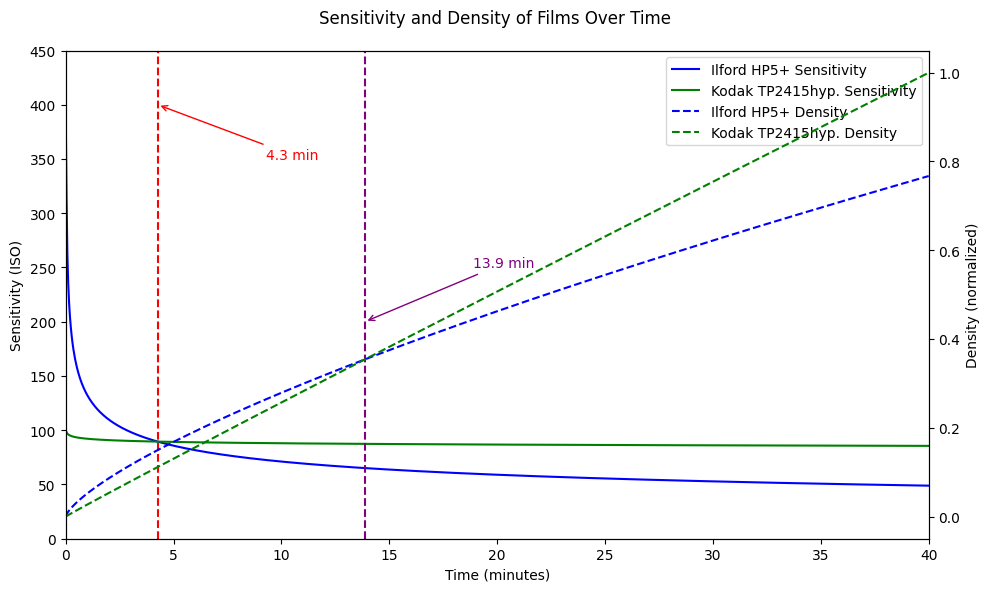

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter der Filme
p_ilford = 0.73
iso_ilford = 400

p_kodak = 0.98
iso_kodak = 100

# Zeitbereich von 0 bis 40 Minuten in Sekunden
time = np.linspace(0, 2400, 1000)  # Start bei 0 Sekunden

# Funktion für Empfindlichkeit
def calculate_sensitivity(iso, p, t):
    if (t == 0) or (p == 1):
        return iso
    else:
        return iso * t ** (-1 + p)


# Funktion für Schwärzung
def calculate_density(iso, p, t):
    if (t == 0):
        return 0  # Keine Schwärzung bei t=0
    return (iso / p) * t ** p

# Arrays für Empfindlichkeit und Schwärzung berechnen
sensitivity_ilford = np.array([calculate_sensitivity(iso_ilford, p_ilford, t) for t in time])
sensitivity_kodak = np.array([calculate_sensitivity(iso_kodak, p_kodak, t) for t in time])

density_ilford = np.array([calculate_density(iso_ilford, p_ilford, t) for t in time])
density_kodak = np.array([calculate_density(iso_kodak, p_kodak, t) for t in time])

max_density = max(max(density_ilford), max(density_kodak))

# Plotten der Daten
fig, ax1 = plt.subplots(figsize=(10, 6))

# Linke y-Achse: Empfindlichkeit
ax1.plot(time / 60, sensitivity_ilford, label="Ilford HP5+ Sensitivity", color="blue")
ax1.plot(time / 60, sensitivity_kodak, label="Kodak TP2415hyp. Sensitivity", color="green")
ax1.set_xlabel("Time (minutes)")
ax1.set_ylabel("Sensitivity (ISO)", color="black")
ax1.set_xlim(0, 40)
ax1.set_ylim(0, 450)
ax1.tick_params(axis="y", labelcolor="black")

# Rechte y-Achse: Schwärzung
ax2 = ax1.twinx()
ax2.plot(time / 60, density_ilford / max_density, label="Ilford HP5+ Density", color="blue", linestyle="dashed")
ax2.plot(time / 60, density_kodak / max_density, label="Kodak TP2415hyp. Density", color="green", linestyle="dashed")
ax2.set_ylabel("Density (normalized)", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Legenden für beide Achsen kombinieren
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

# Vertikale Linien für Schnittpunkte
intersection_sensitivity = 256 / 60  # Minuten
intersection_density = 832 / 60  # Minuten

ax1.axvline(x=intersection_sensitivity, color="red", linestyle="--", label="Sensitivity Intersection")
ax1.axvline(x=intersection_density, color="purple", linestyle="--", label="Density Intersection")

# Annotationen für Schnittpunkte
ax1.annotate(
    f"{intersection_sensitivity:.1f} min",
    xy=(intersection_sensitivity, iso_ilford),  # Position der Annotation
    xytext=(intersection_sensitivity + 5, iso_ilford - 50),
    arrowprops=dict(arrowstyle="->", color="red"),
    color="red",
)

ax1.annotate(
    f"{intersection_density:.1f} min",
    xy=(intersection_density, 200),  # Position der Annotation
    xytext=(intersection_density + 5, 250),
    arrowprops=dict(arrowstyle="->", color="purple"),
    color="purple",
)

# Titel und Layout
fig.suptitle("Sensitivity and Density of Films Over Time")
fig.tight_layout()
plt.show()


### Detektoren 4
Gegeben sei die mittlere Energie des Elektronenrauschens in
einem Widerstand (s.u.). Leiten Sie daraus unter Verwendung
der Rayleigh-Jeans Annahme (h $\nu$ << kT ) die Noise-
Temperatur ab!

$$ F_\nu = \frac{h \nu}{e^{h\nu/kT}-1} $$

Antwort:

Für $ h\nu << kT $ können wir die Exponentialfunktion annähern durch die beiden ersten Terme ihrer 
Taylorreihe: $ e^x \approx 1 + x $, also $ F_\nu = \frac{h \nu}{e^{h\nu/kT}-1} = \frac{h \nu}{1 + h\nu/kT -1} $. 1 fällt weg, und $h\nu$ kürzt sich weg, also bleibt übrig: $F_\nu = kT $

### Fotometer / Kameras 1
Wie wird flüssiger Stickstoff erzeugt, verwendet?
Welche Temperatur hat flüssiger Stickstoff nach der
Kondensation

 bei Atmosphärendruck? ;)

Antwort:

Flüssiger Stickstoff (L-$N_2$ ) wird durch fraktionierte Destillation aus flüssiger Luft gewonnen. Luftverflüssigungsmaschinen sind technische Anwendungen des Carnot-Kreisprozesses. Dabei wird das Medium (also die Luft)

a) komprimiert (und erhitzt sich dabei)

b) Auf Umgebungstemperatur gekühlt (z.B. mit Wasserkühlung)

c) Expandiert (verrichtet z.B. Arbeit an einem Kolben, bzw. an einer Turbine)

Dabei kühlt sich die Luft bis kurz über dem Siedepunkt ab. Anschließend wird sie in einer Drossel entspannt, wobei sie sich auf Grund des Joule-Thompson Effekts weiter abkühlt, und verflüssigt (https://de.wikipedia.org/wiki/Linde-Verfahren). Der Siedepunkt von L-$N_2$ beträgt ca. 77 K. Der kritische Punkt liegt bei 126 K, das heißt, es gibt keine flüssige Phase > 126 K (sondern nur eine superkritische Mischphase aus gasförmigem und flüssigem $N_2$).

L-$N_2$ wird zum Kühlen verwendet, z.B. von CCD Detektoren, um den Dunkelstrom zu verringern, aber auch in der IR Astronomie von möglichst vielen Teilen des Teleskops (ab der Fokalebene), da die Raumtemperatur von 300 K ein schwarzer Strahler bei 10 $\mu\,m$ ist, und Streulich erzeugen würde.

Sauerstoff siedet bei 90 K, und ist in flüssiger Form genauso mischbar mit Stickstoff wie in Gasform. Da der Siedepunkt höher ist, siedet aus flüssiger Luft bevorzugt $N_2$ ab. Würde man also zum ständigen Kühlen ohne zwischendurch Aufwärmen flüssige Luft verwenden, und die verdampfte Flüssigkeit regelmäßig damit auffüllen, würde man eine stetig wachsende Konzentration an $O_2$ erzielen im Dewar, bis zu einem Punkt, wo es brand- und explosionsgefährlich wird. Aus dem Grund verwendet man tatsächlich $L-N_2$ und nicht flüssige Luft.

### Fotometer / Kameras 2
Welche Temperaturen kann man mit Trockeneiskühlung einfach
erreichen? Wie wird Trockeneis erzeugt, verwendet?

Antwort:

Trockeneis ($CO_2$ ) sublimiert bei 1 bar bei -56°C. Es kann mit Azeton gemischt in Kältemischungen bis zu -78°C leicht erreichen (https://en.wikipedia.org/wiki/Dry_ice). Das funktioniert physikalisch ähnlich wie eine Kältemischung aus Wassereis und Salz.
Die Erzeugung erfolgt großtechnisch durch Kompression, Abkühlung auf Umgebungstemperatur (führt zur Verflüssigung), und anschließendem Verringern des Druckes. Dabei verdampft ein Teil des flüssigen $CO_2$ und entzieht dem Rest soviel Wärme, dass der fest wird, zu Trockeneinsschnee.

Es wird verwendet unter anderem in Diskotheken zur Erzeugung von Dämpfen, bzw. Nebel, also als Nebelmaschine. Weiters in chemischen Laboren, bei der Herstellung explosiver Chemikalien, um die Reaktionslust zu verringern. Weitere wichtige Anwendungen sind zum Kühlen von Lebensmitteln und Medikamenten (z.B. auch des Covid Impfstoff) am Transport. In der Dermatologie wird es verwendet, um bestimmte Hautveränderungen weg zu "brennen", z.B. Warzen, aber auch Krebsvorstufen. 

Eine astronomische Anwendung ist mir nicht bekannt.

### Fotometer / Kameras 3
Wie funktioniert Peltierkühlung?

Antwort:

Der Seebeck Effekt besteht darin, dass bei der Verbindung zweier verschiedener Metalle eine von der Temperatur abhängige Spannung entlang des Metalles entsteht. Die Umkehrung davon ist der Peltiereffekt. Ein Strom wird durch Kontaktstellen unterschiedlicher Metalle geschickt. Dabei erwärmt sich die eine, und die andere kühlt sich ab. Konkret bestehen Peltierelemente aus Halbleitern, und zwar abwechselnd n- und p-dotierten in Serienschaltung.

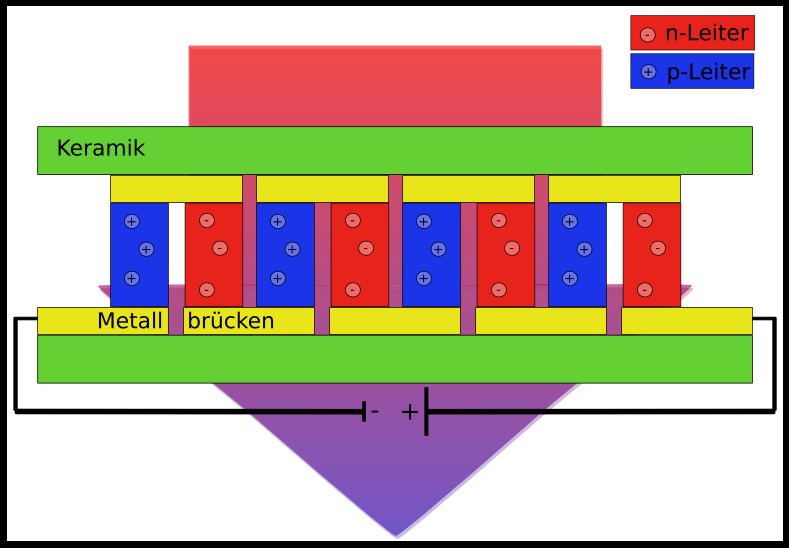
(https://de.wikipedia.org/wiki/Peltier-Element)

Peltierelemente werden in Campingkühlboxen verwendet, weil da nicht genug Platz für ein Kompressionsaggregat ist. Außerdem werden sie in der Astrofotografie verwendet, um den Detektorchip zu kühlen, dabei werden bei handelsüblichen Kameras (z.B. ZWO) Temperaturen von 40° unterhalb der Umgebungstemperatur erreicht. Dadurch verringern sich Rauschen und Dunkelstrom.

### Fotometer / Kameras 4
Die Stokes-Vektoren eines Lichtstrahls sind
(1, -0,03978, 0,06754, 0) Wie groß ist der Polarisationsgrad?
Wie groß ist der Wert des Polarisationswinkels?

Antwort:

I = 1; Q = -0,03978; U = 0,06754; V = 0

$P=\frac{\sqrt{Q^2 + U^2 + V^2}}{I} = 0,07838$

$ \Theta = \frac{1}{2}\arctan(\frac{U}{Q}) = $ 30°29'51" (+90° weil Q<0)


### Filter
Gesucht ist die spektrale Energieverteilung (SED) des Halbregelmäßig Veränderlichen
RV Boo (IRAS 14371+3245) vom Visuellen bis ins Ferne Infrarot. Folgende
Literaturdaten stehen zur Verfügung:

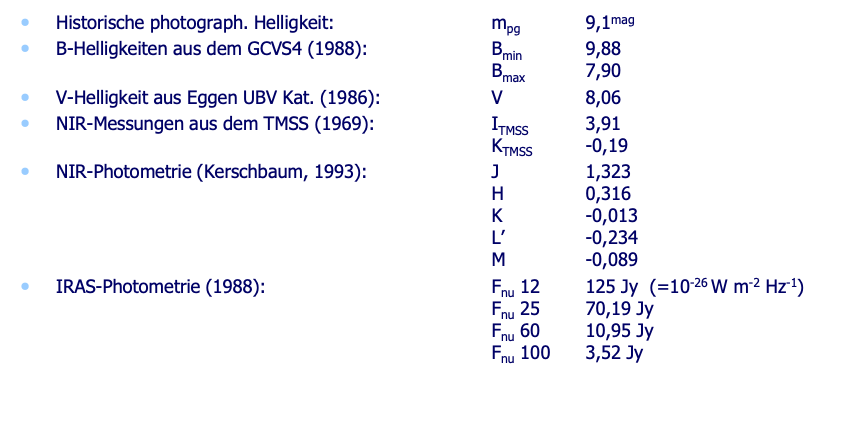

Gesucht ist die SED in Form eines doppellogaritmischen Plots $\nu$ $F\nu$ gegen $\lambda$!
Dazu stehen folgende Zusatzinfos bzw. Transformationen zur Verfügung (aus LB2b, LeBertre,
1988, IRAS Exp-Sup):

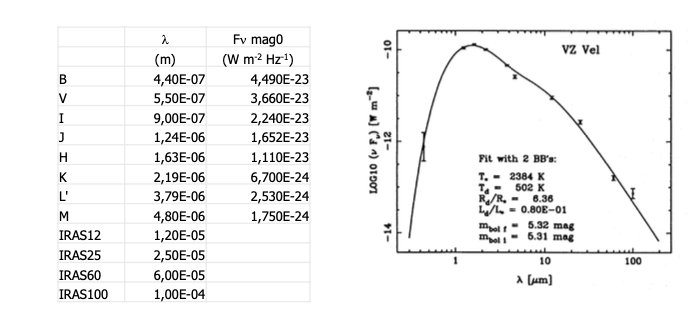

B-$m_{pg}$ = 0,11

$ I_{Johnson} = I_{TMSS}– 0,117 – 0,255 * ( I_{TMSS}– K_{TMSS}) $

Antwort:


Von Fluss mag $_o$ auf Fluss bei gemessener mag wurde umgerechnet mit der Formel $I_2 = I_1 \cdot 10^{-\frac{m}{2.5}} $

| Band | mag | $I_2 / I_1 $ | Fluss @mag | $\nu$ (Hz) | $ \nu F(\nu)$ |
|:-----:|:---:|:-----------:|:----------:|:----------:|:-------------:|
|$m_{pg}$|9.21|  2.07e-4    | 9.29e-27   | 6.82e14    | 6.34e-12      |
|$B_{min}$|9.88| 1.12e-4    | 5.01e-27   | 6.82e14    | 3.42e-12 |
|$B_{max}$|7.9 | 6.92e-4    | 3.11e-26   | 6.82e14    | 2.12e-11 |
|V       | 8.06 | 5.97e-4 | 2.19e-26 | 5.45e14 | 1.19e-11 |
| TMSS | 2.7475 | 7.96e-2 | 1.94e-24 | 3.33e14 | 6.48e-10 |
|J  | 1.323 | 2.96e-1 | 4.88e-24 | 2.42e14 | 1.18e-9 |
| H | 0.316 | 7.47e-1 | 8.3e-24 | 1.84e14 | 1.53e-9 |
 K | -0.013 | 1.01 | 6.78e-24 | 1.37e14 | 9.29e-10 |
| L' | -0.234 | 1.24 | 3.14e-24 | 7.92e13 | 2.48e-10 |
|M | -0.089 | 1.09 | 1.9e-24 | 6.25e13 | 1.19e-10 |
|IRAS12 |  |  | 1.25e-23 | 2.5e13 | 3.13e-10 |
|IRAS25 | | | 7.02e-24 | 1.2e13 | 8.42e-11 |
|IRAS60 | | | 1.1e-24 | 5e12 | 5.48e-12 |
|IRAS100 | | | 3.52e-25 | 3e12 | 1.06e-12 |

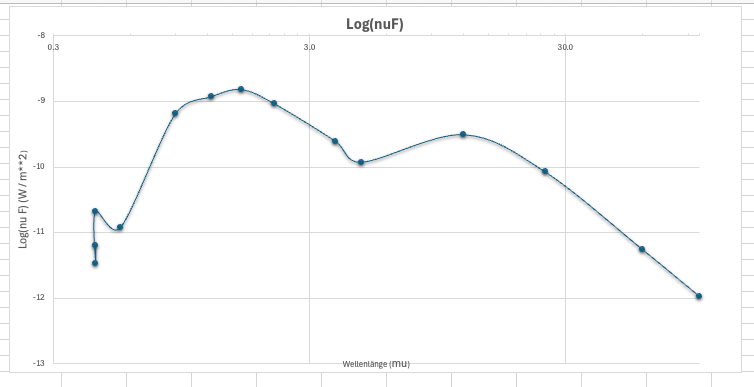

Das Bild weist ebenso wie bei VZ Vel auf zwei schwarze Strahler hin, einer im Mikrowellenbereich, also wohl auch eine Staubscheibe. Aus den 3 übereinanderliegenden Punkten am Abstand, und der Angabe, dass dieser Stern veränderlich ist, muss man annehmen, dass auch bei den anderen Wellenlängen Schwankungen auftreten, die aber wohl nicht gemessen wurden (oder zumindest hier nicht angegeben wurden). Insoferne ist der glatte und schöne Verlauf der Kurve verdächtig, fast zu schön, um wahr zu sein.

### Rauschen
Mit einem Photomultiplier misst man ca. 14.000 Photonen/s für einen
Stern von Helligkeit m(B) = 13,0 auf einem 2,1 m Teleskop, ohne
Hintergrund. Der Himmelshintergrund beträgt m(B) = 21 mag/“2

#### 1) 

Wie hoch ist die Photonenrate eines Sterns mit m(B) = 6,0 mag am
0,6m Teleskop?

Antwort:

Erster Schritt: Anzahl der Photonen am gleichen Teleskop:

$m_1 - m_2 = -2.5 \log{\frac{I_1}{I_2}} $

$I_2 = I_1 \cdot 10^{\frac{m_2 - m_1}{2.5}} = I_1 \cdot 10^{\frac{7}{2.5}} = 630.96 \cdot I_1 $

Zweiter Schritt:
Lichtsammelvermögen proportional zur Spiegelfläche, also $ \alpha (\frac{0.6}{2.1})^2 = 0.0816 $

$ I_2 = 14000 * 630.96 * 0.0816 = 720800$ Photonen/sec.




#### 2)
Wie hoch ist die Hintergrundzählrate in einer 30“ durchmessenden
Messblende? (für 0,6m Teleskop)

Antwort:

Fläche der Messblende = $(15*15*pi)"^2 = 706.86"^2$

Jetzt vergleiche ich die Photonen aus 1) für 6,0 mag mit den 21 mag/"$^2$

$-2.5 \log{(706.86/1)} = -7,12$ mag. Das ist die Differenz des  Himmelshintergrunds über die gesamte Fläche verglichen mit $1"^2$. Das heißt, über die Messblende haben wir 21 - 7,12 = 13,88 mag für den Hintergrund. Und damit gehe ich wieder in die Gleichung für die Flussraten, und vergleiche Hintergrund und Stern in mag mit der oben ermittelten Photonenrate:

$I_2 = 720800 \cdot 10^{-\frac{13,88 - 6}{2,5}} = 509,5$ Photonen / sec

#### 3)
Wie hoch ist das Signal/Rausch Verhältnis anhand der Photonenstatistik im Fall einer Integrationszeit für den Stern von 60s und 10s
für den Himmel; der Fehler in Magnituden (für 0,6m und 6,0mag!)?

Antwort:

$ S/N = S / \sqrt{S} = \sqrt{S} $

Stern, 60 sec: $S/N = \sqrt{60 \cdot 720800} = 6576 $

Hintergrund, 10 sec: $S/N =  \sqrt{10 \cdot 509,5} = 71 $

$ \Delta m = -2.5 \log{\frac{720800 \pm 6576}{720800}} = \pm\,10$ m mag. Diese Zahl enthält nur den Fehler aus der Sternzählrate. In diesem Fall (Hintergrund mehr als 1000 mal kleinere Zählrate als Stern, Hintergrundfehler 100 mal kleiner als Sternfehler) ist diese Betrachtung ausreichend. Jedoch für 15 mag:

#### 4)
Wie 3, aber Stern hat m(B) = 15,0 mag?

Antwort:
$I_2 = 720800 \cdot 10^{\frac{6 - 15}{2,5}} = 181$ Photonen / sec

Hier beträgt S/N = $\sqrt{181} =$ 13. Außerdem ist der Hintegrund heller als der Stern, das heißt, hier darf man nicht vergessen, ihn zu subtrahieren. Außerdem müssen die Fehler sauber addiert werden:

S = 181, N(S) = 13.45

H = 509.5; N(H) = 71

S+H = 690.5, N(S+H) = 26.3

$\sigma(S) = \sqrt{\sigma^2(S+H) + \sigma^2(H)} = 75.7 $

Für den Magnitudenfehler muss für beide Richtungen eingesetzt werden:

$ \Delta m = -2.5 \log{\frac{690.5 \pm 75.7}{690.5}} = $+0,126 / -0,113 m mag



#### 5)
Wie 4, aber mit einer statistisch optimalen Zeiteinteilung der 70s?

Antwort:

Beste Zeiteinteilung für 

$r = t_{S+H}/t_H = \sqrt{(S+H)/H} = \sqrt{690.5/509.5} = 1.164 $

$t_{S+H} = 1.164\cdot t_H$ und $t_{S+H} + t_H = 70 => 2.164\cdot t_H = 70 $

$t_H$ = 32 sec, $t_{S+H}$ = 38 sec